In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [3]:
def load_systems_data(degradation_setting, rain_scenario, file_type="concentrations"):
    if file_type=="concentrations":
        df_res = pd.read_csv(os.path.join("systems_output", "preprocessed", f"{degradation_setting}_{rain_scenario}.csv"))
        df_res = df_res.loc[df_res.minutes>0,:]
    elif file_type=="flow_rates":
        df_res = pd.read_csv(os.path.join("systems_output", "preprocessed", f"flow_rates_{degradation_setting}_{rain_scenario}.csv"))
        df_res.minutes = df_res.minutes - 70 # ensure time consistency with concentrations
        df_res = df_res.loc[df_res.minutes>0,:]
    else:
        assert False, f"file_type {file_type} not supported"

    df_res.time = pd.to_datetime(df_res.time)

    # drop MW064, RW156 (invalid calculations of ++systems)
    df_res = df_res.loc[~df_res.sampling_point.isin(["MW064", "RW156"]), :]
    # rename sampling locations according to naming in the paper
    df_res.sampling_point = df_res.sampling_point.map({"MW022": "1", "MW023": "2", "MW017": "3", "MW043": "4", "MW048": "5", 
                        "RW157": "6", "MW046": "7", "MW061": "8", "RW143": "9", "RW141": "10",
                        "RW155": "11", "MW059": "12", "RW211": "13", "MW054": "14",
                        "RW126": "15", "MW052": "16"})
    return df_res

In [4]:
rain_scenarios = ["KeinRegen", "Nieselregen", "MittelstarkerRegen"]
degradation_setting = "no_degradation"
df_1 = load_systems_data(degradation_setting, rain_scenarios[0], file_type="concentrations")
df_2 = load_systems_data(degradation_setting, rain_scenarios[1], file_type="concentrations")
df_3 = load_systems_data(degradation_setting, rain_scenarios[2], file_type="concentrations")

## Preprocessing

In [5]:
df_1["rain_scenario"] = rain_scenarios[0]
df_2["rain_scenario"] = rain_scenarios[1]
df_3["rain_scenario"] = rain_scenarios[2]
df_rain = pd.concat([df_1, df_2, df_3])

## Visualizations

In [9]:
def plot_rain_scenarios(df_rain, station, save_fig=False):
    fig, ax = plt.subplots(figsize = (12,6)) 
    df_sub = df_rain.loc[df_rain.sampling_point==station, :].sort_values("time")
    n_nans = df_sub.isna().sum()["copies/l"]
    print(f"{station}: {n_nans} NaNs detected, {df_sub.shape[0]} samples in total")
    if n_nans>0:
        print("Dropping NaNs")
        df_sub = df_sub.dropna()
    sns.lineplot(df_sub, x="time", y="copies/l", hue="rain_scenario")
    plt.title(f"{station}")
    plt.xlabel('time (days)')
    plt.ylabel('concentration (copies/l)')
    date_form = DateFormatter("%d")
    ax.xaxis.set_major_formatter(date_form)
    if save_fig:
        plt.savefig(os.path.join("systems_output", "plots", "station_concentration", "rain_scenarios", f"{degradation_setting}_{station}.png"))
        plt.close(fig)
    else:
        plt.close(fig)
        return fig

17: 0 NaNs detected, 3024750 samples in total


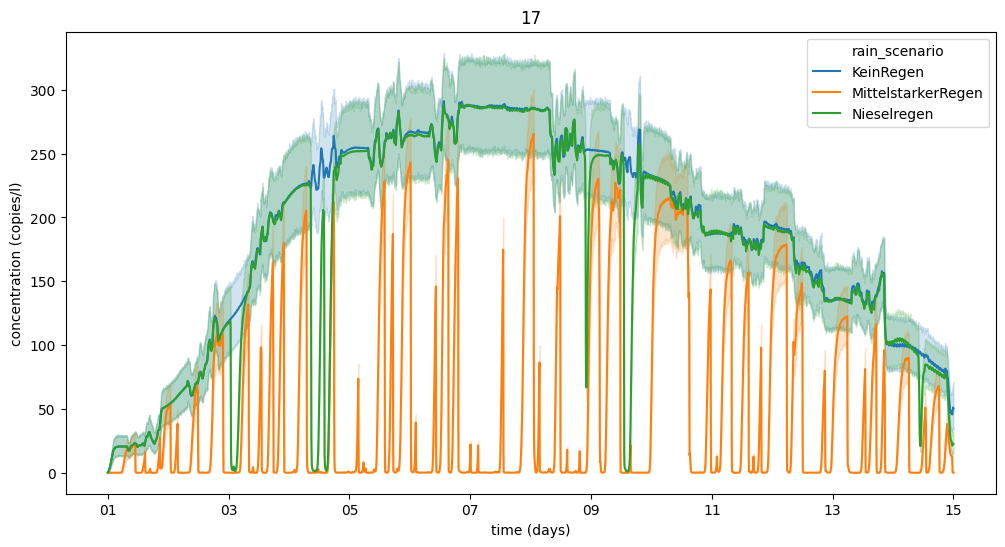

In [17]:
plot_rain_scenarios(df_rain, "16")

In [ ]:
for station in df_rain.sampling_point.unique():
# for station in ["1", "2", "8", "14", "16"]:
    plot_rain_scenarios(df_rain, station, save_fig=True)

In [11]:
date_form = DateFormatter("%-d")


def rain_scenarios_next_to_each_other(station):
    df_station = df_rain.loc[df_rain.sampling_point==station,:].sort_values("time")

    fig, axs = plt.subplots(ncols=3, sharey=False, figsize=(18, 6), dpi=300)
    for i, (variate, variate_title) in enumerate(zip(["KeinRegen", "Nieselregen", "MittelstarkerRegen"], ["no precipitation", "moderate gentle rain showers", "moderate rain showers"])):
        sns.lineplot(data=df_station.loc[df_station.rain_scenario==variate,:], x="time", y="copies/l", ax=axs[i], color=["slategray", "cornflowerblue", "navy"][i])
        axs[i].set_title(f"{variate_title}", fontsize=20)    
        axs[i].xaxis.set_major_formatter(date_form) 
        axs[i].set_xlabel(f"simulation time (days)", fontsize=15)
        if i==0:
            axs[i].set_ylabel(f"copies/l", fontsize=15)
        else:
            axs[i].set_ylabel("")
        axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
        axs[i].tick_params(axis='x', labelsize=12)
        axs[i].tick_params(axis='y', labelsize=12)

    fig.savefig(os.path.join("systems_output", "plots", "station_concentration", "rain_scenarios", f"next_to_each_other_{degradation_setting}_{station}.png"))
    plt.close(fig)

for station in ["1", "8", "16"]:
    rain_scenarios_next_to_each_other(station)

/tmp/ipykernel_81140/3188055279.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_81140/3188055279.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_81140/3188055279.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_81140/3188055279.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_81140/3188055279.py:17: UserWarning: 

# Overview of Rain Settings

In [3]:
df_gentle = pd.read_csv(os.path.join("systems_output", "base", "nieselregen.txt"), sep="\t")
df_moderate = pd.read_csv(os.path.join("systems_output", "base", "mittelstarker_regen.txt"), sep="\t")

df_gentle["rain_scenario"] = "Nieselregen"
df_moderate["rain_scenario"] = "MittelstarkerRegen"
df = pd.concat([df_gentle, df_moderate])


df.columns = ["time", "l/s*ha", "rain_scenario"]
df.time = df.time / 60 / 24 # minutes -> days

In [ ]:
df["hours"] = df.time * 24

In [24]:
df["hours"].describe()

count    8064.000000
mean      168.041667
std        97.000857
min         0.083333
25%        84.062500
50%       168.041667
75%       252.020833
max       336.000000
Name: hours, dtype: float64

In [56]:
aggregated_hours = 2

In [70]:
bins = pd.interval_range(start=0, end=336, freq=aggregated_hours)

# Use pd.cut to assign each value to a bin
df['bin'] = pd.cut(df['hours'], bins)

# Group by the bins and sum the values
aggregated_df = df.groupby('bin')['l/s*ha'].sum().reset_index()


/tmp/ipykernel_80135/3488841840.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = df.groupby('bin')['l/s*ha'].sum().reset_index()


In [71]:
aggregated_df[f"days"] = np.linspace(0, 14, len(bins))

In [72]:
aggregated_df.head()

,bin,l/s*ha,days
0,"(0, 2]",686.007,0.000000
1,"(2, 4]",948.472,0.083832
2,"(4, 6]",181.986,0.167665
3,"(6, 8]",0.000,0.251497
4,"(8, 10]",0.000,0.335329


Text(0.5, 1.0, 'Histogram of Precipitation over Time')

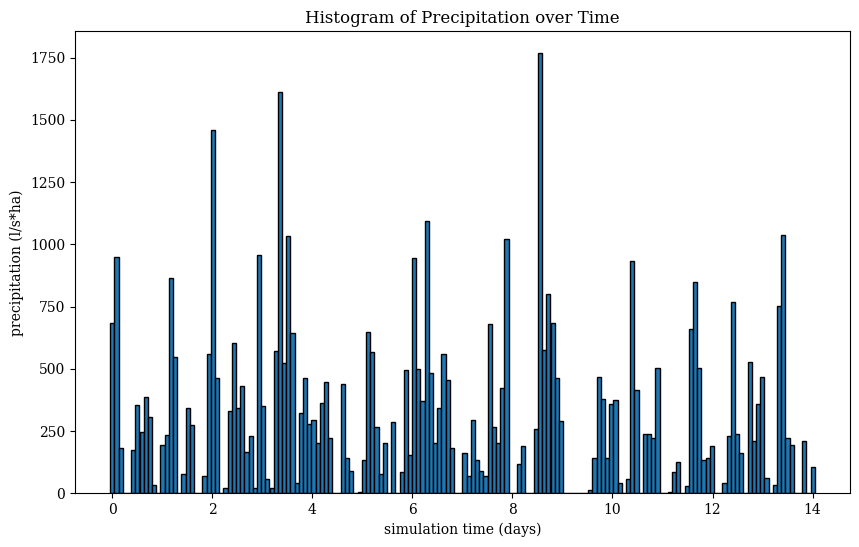

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(aggregated_df[f'days'], aggregated_df['l/s*ha'], width=1/24*aggregated_hours, edgecolor='black')

# Add labels and title
plt.xlabel('simulation time (days)')
plt.ylabel('precipitation (l/s*ha)')
plt.title('Histogram of Precipitation over Time')

/tmp/ipykernel_80135/734100757.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([" ", "0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_80135/734100757.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([" ", "0", "2", "4", "6", "8", "10", "12", "14"])


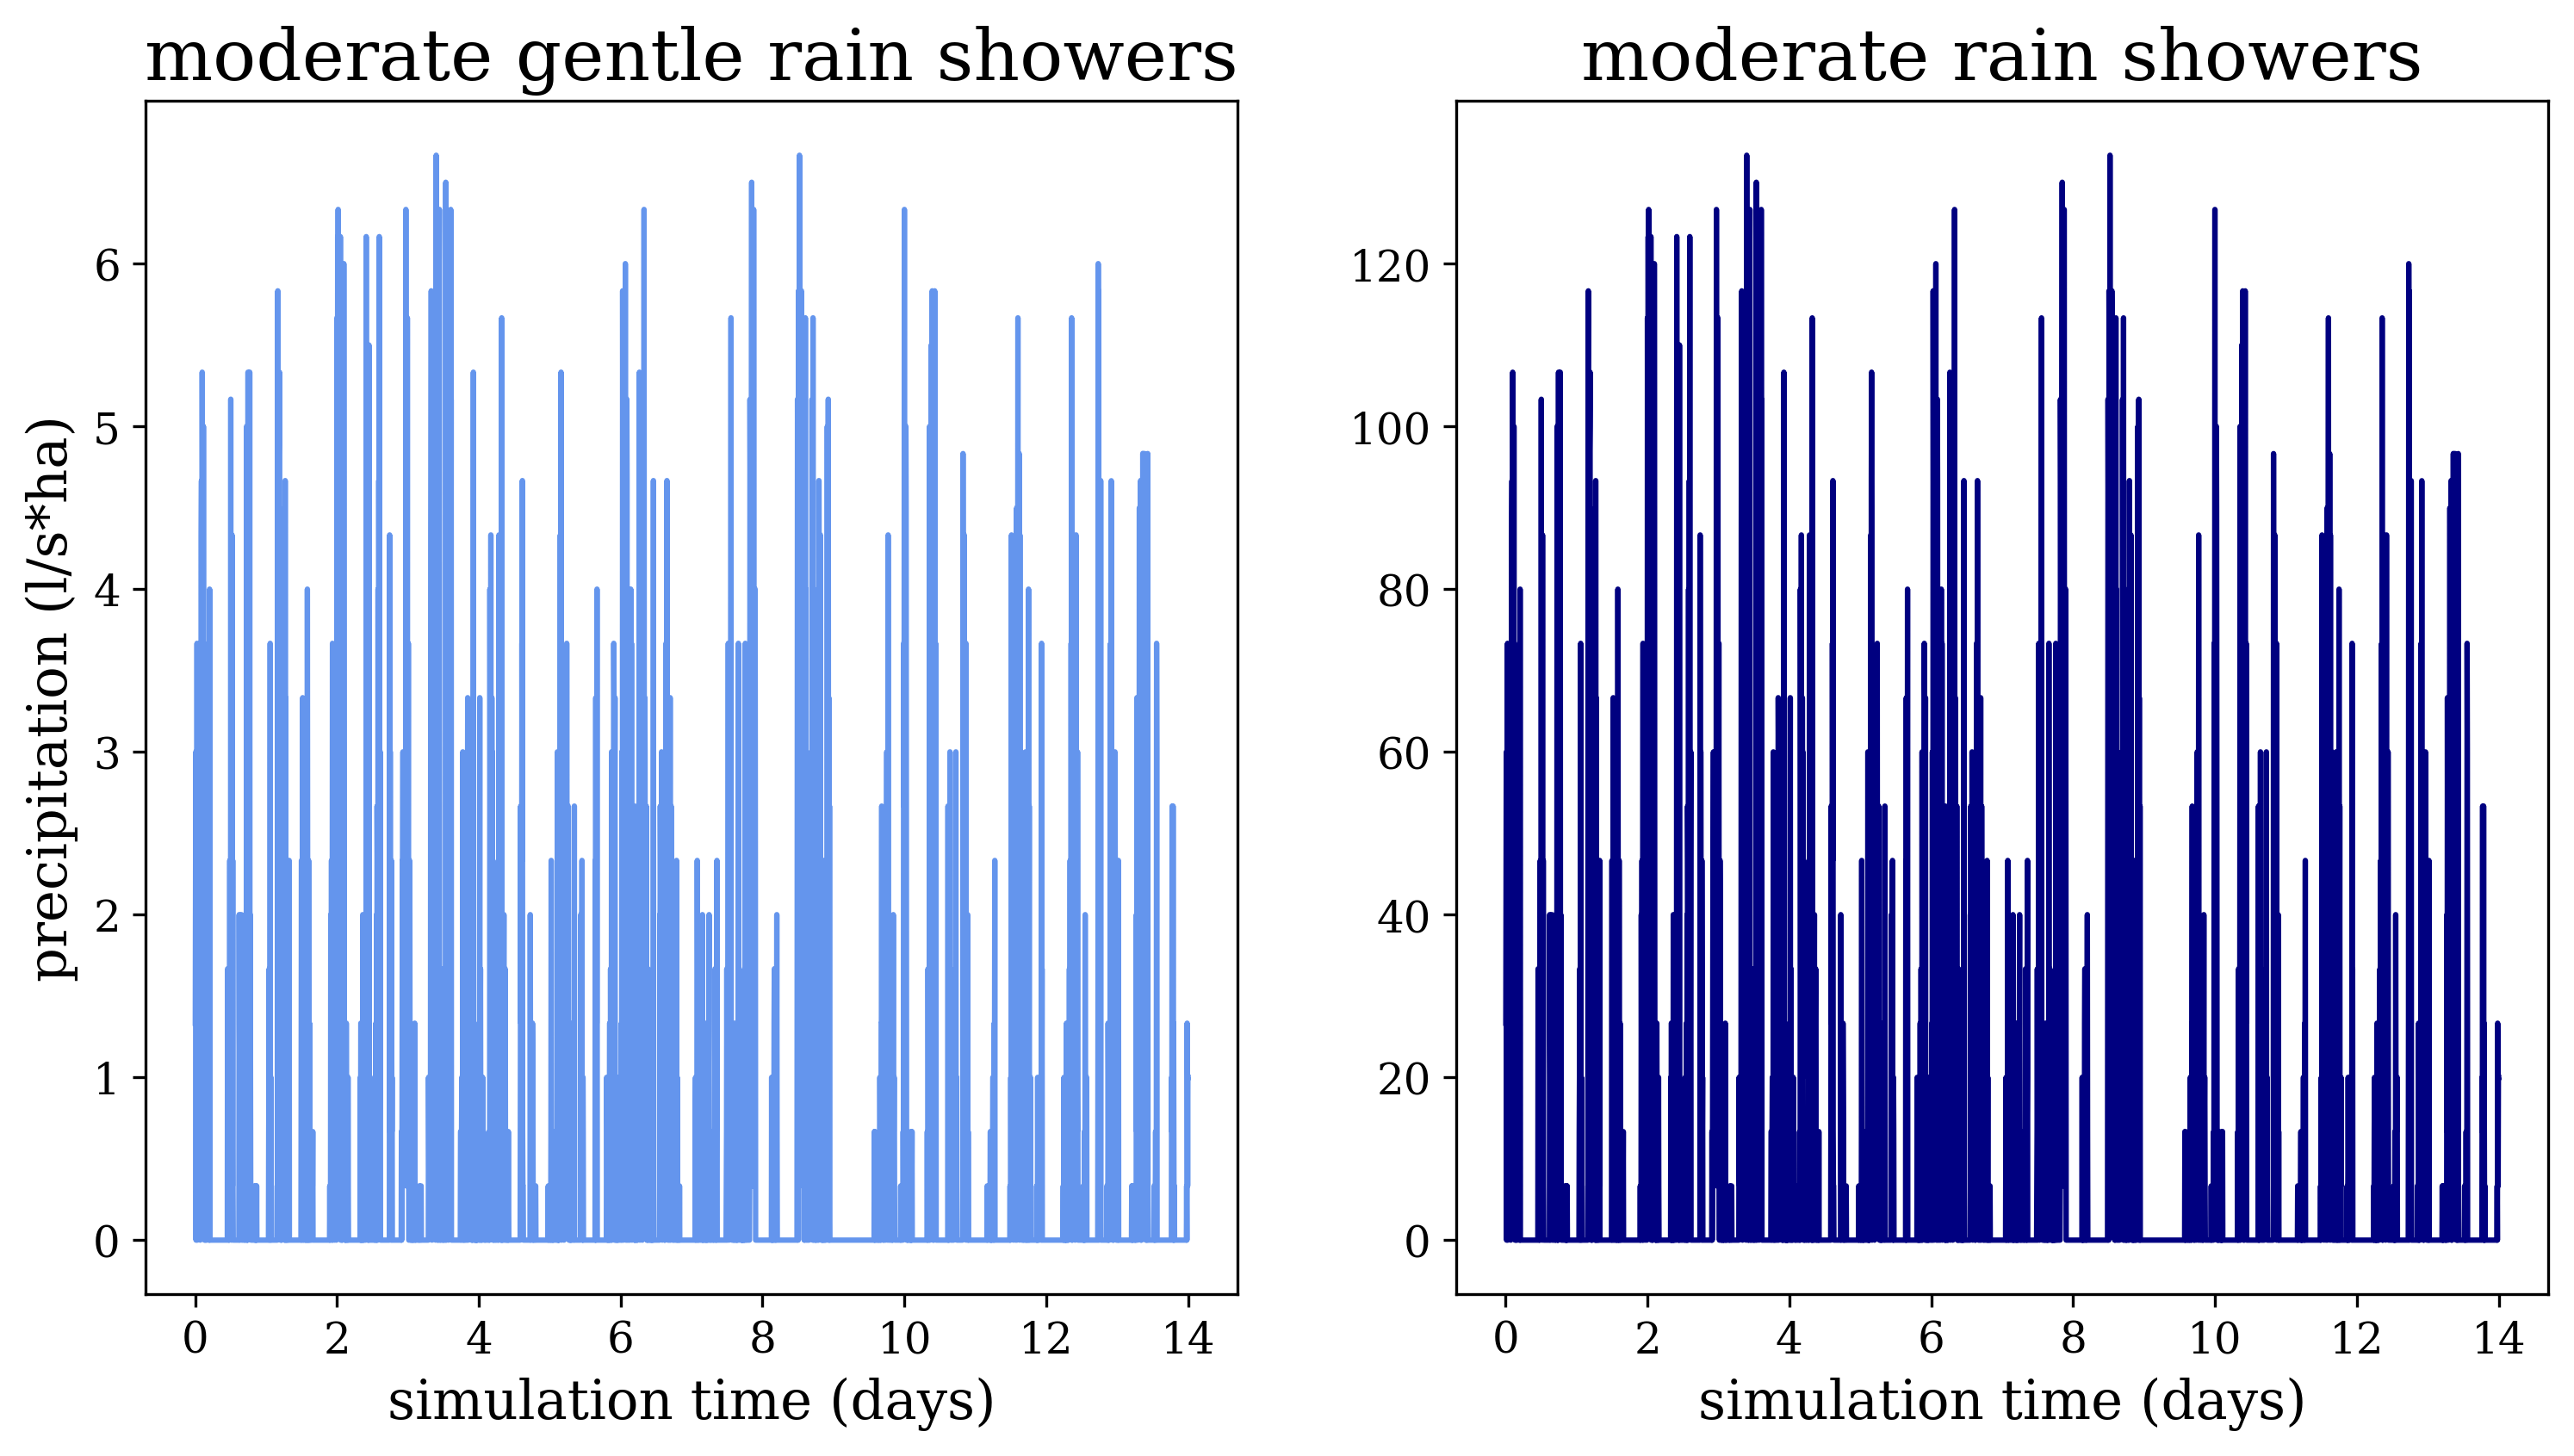

In [45]:
date_form = DateFormatter("%-d")

fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(12, 6), dpi=300)
for i, (variate, variate_title) in enumerate(zip(["Nieselregen", "MittelstarkerRegen"], ["moderate gentle rain showers", "moderate rain showers"])):
    sns.lineplot(data=df.loc[df.rain_scenario==variate,:], x="time", y="l/s*ha", ax=axs[i], color=["cornflowerblue", "navy"][i])
    axs[i].set_title(f"{variate_title}", fontsize=20)    
    axs[i].xaxis.set_major_formatter(date_form) 
    axs[i].set_xlabel(f"simulation time (days)", fontsize=15)
    if i==0:
        axs[i].set_ylabel(f"precipitation (l/s*ha)", fontsize=15)
    else:
        axs[i].set_ylabel(" ")
    axs[i].set_xticklabels([" ", "0", "2", "4", "6", "8", "10", "12", "14"])
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

fig.savefig(os.path.join("systems_output", "plots", "station_concentration", "rain_scenarios", f"precipitation_overview.png"))